In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

34754

In [161]:
# 2013-2014: 58, 2015-2018 59, 2019: 62
data = []
data.append(pd.read_csv("RawData/LR_Mendon_AA_QC_0_Source_1_2013.csv",skiprows=58))
data.append(pd.read_csv("RawData/LR_Mendon_AA_QC_0_Source_1_2014.csv",skiprows=58))
data.append(pd.read_csv("RawData/LR_Mendon_AA_SourceID_1_QC_0_Year_2015.csv",skiprows=59))
data.append(pd.read_csv("RawData/LR_Mendon_AA_SourceID_1_QC_0_Year_2016.csv",skiprows=59))
data.append(pd.read_csv("RawData/LR_Mendon_AA_SourceID_1_QC_0_Year_2017.csv",skiprows=59))
data.append(pd.read_csv("RawData/LR_Mendon_AA_SourceID_1_QC_0_Year_2018.csv",skiprows=59))
data.append(pd.read_csv("RawData/LR_Mendon_AA_SourceID_1_QC_0_Year_2019.csv",skiprows=62))


In [164]:
t = []
for i in data:
    t.append(list(i.shape ))

In [166]:
pd.DataFrame(t)

,0,1
0,7809,29
1,34931,29
2,34754,34
3,35128,34
4,35025,34
5,35035,34
6,30947,37


In [68]:
min(rawdata["ODO"])

0.0

## corrected data

In [6]:
correcteddata = pd.read_csv("CorrectedData/LR_Mendon_AA_ODO_SourceID_1_QC_1.csv",skiprows=58)

In [7]:
correcteddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186817 entries, 0 to 186816
Data columns (total 6 columns):
LocalDateTime    186817 non-null object
UTCOffset        186817 non-null float64
DateTimeUTC      186817 non-null object
ODO              186817 non-null float64
CensorCode       186817 non-null object
QualifierCode    10860 non-null object
dtypes: float64(2), object(4)
memory usage: 8.6+ MB


In [8]:
correcteddata["CensorCode"].value_counts()

nc    186817
Name: CensorCode, dtype: int64

In [9]:
# Qualifier Codes
# ----------------------------------
# LI: Linear Interpolation
# SM: Sensor Malfunction
# PF: Power Failure
# S: Suspicious Values
# MNT: Erroneous or missing data due to maintenance
# SED: Sediment interference with sensor
# CAL: Improper or erroneous calibration
#
#

In [167]:
correcteddata["CensorCode"].value_counts()

nc    186817
Name: CensorCode, dtype: int64

In [11]:
correcteddata[correcteddata["QualifierCode"] == 'S']

,LocalDateTime,UTCOffset,DateTimeUTC,ODO,CensorCode,QualifierCode
183690,2019-03-29 10:30:00,-7.0,2019-03-29 17:30:00,9.80,nc,S
183691,2019-03-29 10:45:00,-7.0,2019-03-29 17:45:00,9.98,nc,S
183692,2019-03-29 11:00:00,-7.0,2019-03-29 18:00:00,10.00,nc,S
183693,2019-03-29 11:15:00,-7.0,2019-03-29 18:15:00,10.08,nc,S
183694,2019-03-29 11:30:00,-7.0,2019-03-29 18:30:00,10.17,nc,S
...,...,...,...,...,...,...
184691,2019-04-08 20:45:00,-7.0,2019-04-09 03:45:00,9.52,nc,S
184692,2019-04-08 21:00:00,-7.0,2019-04-09 04:00:00,9.51,nc,S
184693,2019-04-08 21:15:00,-7.0,2019-04-09 04:15:00,9.43,nc,S
184694,2019-04-08 21:30:00,-7.0,2019-04-09 04:30:00,9.38,nc,S


In [12]:
# 2019 April data
monthData = correcteddata[(correcteddata["LocalDateTime"] >= '2019-04-01 00:00:00') & (correcteddata["LocalDateTime"] <= '2019-04-30 23:59:59')]

In [13]:
monthData.head(10)

,LocalDateTime,UTCOffset,DateTimeUTC,ODO,CensorCode,QualifierCode
183936,2019-04-01 00:00:00,-7.0,2019-04-01 07:00:00,9.38,nc,S
183937,2019-04-01 00:15:00,-7.0,2019-04-01 07:15:00,9.43,nc,S
183938,2019-04-01 00:30:00,-7.0,2019-04-01 07:30:00,9.48,nc,S
183939,2019-04-01 00:45:00,-7.0,2019-04-01 07:45:00,9.47,nc,S
183940,2019-04-01 01:00:00,-7.0,2019-04-01 08:00:00,9.48,nc,S
183941,2019-04-01 01:15:00,-7.0,2019-04-01 08:15:00,9.50,nc,S
183942,2019-04-01 01:30:00,-7.0,2019-04-01 08:30:00,9.50,nc,S
183943,2019-04-01 01:45:00,-7.0,2019-04-01 08:45:00,9.49,nc,S
183944,2019-04-01 02:00:00,-7.0,2019-04-01 09:00:00,9.49,nc,S
183945,2019-04-01 02:15:00,-7.0,2019-04-01 09:15:00,9.46,nc,S


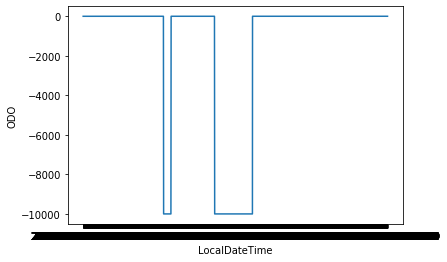

In [14]:
sns.lineplot(x="LocalDateTime", y ="ODO", data=monthData)

In [15]:
monthData2 = monthData[monthData["ODO"] > 0]

In [16]:
monthData2.QualifierCode.value_counts()

S     760
LI      2
Name: QualifierCode, dtype: int64

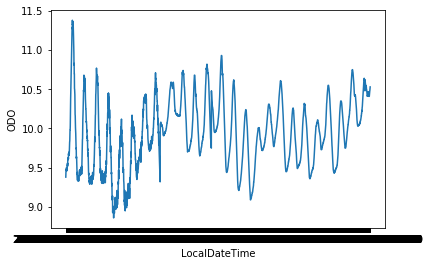

In [17]:
sns.lineplot(x="LocalDateTime", y ="ODO", data=monthData2)

In [18]:
correcteddata2 = correcteddata[correcteddata["ODO"] >= 0]

In [19]:
correcteddata2.QualifierCode.value_counts()

CAL    2582
LI     1824
S      1006
MNT      32
SM        1
Name: QualifierCode, dtype: int64

In [20]:
correcteddata2.ODO.value_counts()

9.760000     564
9.840000     547
9.790000     546
9.450000     543
9.550000     535
            ... 
11.696186      1
10.149410      1
8.522999       1
10.715204      1
12.280744      1
Name: ODO, Length: 31882, dtype: int64

## adjusted data

In [21]:
# filepaths = ["LR_Mendon_AA_Chlorophyll_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_fDOM_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_Nitrate-N_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_ODO_Local_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_ODO_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_pH_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_SpCond_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_Stage_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_TurbMed_SourceID_1_QC_1.csv",
#              "LR_Mendon_AA_WaterTemp_EXO_SourceID_1_QC_1.csv"
#             ]
# adjustedData = []
# for i in filepaths:
#     adjustedData.append(pd.read_csv("AdjustedData/" + i))

In [22]:
# adjustedData = []
# adjustedData.append(pd.read_csv("AdjustedData/LR_Mendon_AA_ODO_SourceID_1_QC_1.csv",skiprows=58 ))
# adjustedData.append(pd.read_csv("AdjustedData/LR_Mendon_AA_pH_SourceID_1_QC_1.csv",skiprows=58 ))
# adjustedData.append(pd.read_csv("AdjustedData/LR_Mendon_AA_SpCond_SourceID_1_QC_1.csv",skiprows=58 ))

/opt/anaconda3/envs/env6830/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [138]:
odo = pd.read_csv("AdjustedData/LR_Mendon_AA_pH_SourceID_1_QC_1.csv",skiprows=58)
var = "pH"

In [139]:
odo.head(10)

,LocalDateTime,UTCOffset,DateTimeUTC,pH,CensorCode,QualifierCode
0,2014-01-01 00:00:00,-7.0,2014-01-01 07:00:00,8.02,nc,NaN
1,2014-01-01 00:15:00,-7.0,2014-01-01 07:15:00,8.12,nc,LI
2,2014-01-01 00:30:00,-7.0,2014-01-01 07:30:00,8.11,nc,LI
3,2014-01-01 00:45:00,-7.0,2014-01-01 07:45:00,8.11,nc,LI
4,2014-01-01 01:00:00,-7.0,2014-01-01 08:00:00,8.10,nc,LI
5,2014-01-01 01:15:00,-7.0,2014-01-01 08:15:00,8.10,nc,LI
6,2014-01-01 01:30:00,-7.0,2014-01-01 08:30:00,8.10,nc,LI
7,2014-01-01 01:45:00,-7.0,2014-01-01 08:45:00,8.09,nc,LI
8,2014-01-01 02:00:00,-7.0,2014-01-01 09:00:00,8.09,nc,LI
9,2014-01-01 02:15:00,-7.0,2014-01-01 09:15:00,8.09,nc,LI


In [140]:
odo["date"] = odo["LocalDateTime"].apply(lambda x: x.split(' ')[0])
odo["year"] = odo["date"].apply(lambda x: x.split('-')[0])
odo["month"] = odo["date"].apply(lambda x: x.split('-')[1])

In [141]:
odo.year.unique()

array(['2014', '2015', '2016', '2017', '2018', '2019'], dtype=object)

In [142]:
len(odo)

186817

In [143]:
odo.groupby(["year"]).count()

,LocalDateTime,UTCOffset,DateTimeUTC,pH,CensorCode,QualifierCode,date,month
year,,,,,,,,
2014,35040,35040,35040,35040,35040,5959,35040,35040
2015,35040,35040,35040,35040,35040,689,35040,35040
2016,35136,35136,35136,35136,35136,72,35136,35136
2017,35040,35040,35040,35040,35040,137,35040,35040
2018,35040,35040,35040,35040,35040,2645,35040,35040
2019,11521,11521,11521,11521,11521,4508,11521,11521


In [144]:
# odo["QualifierCode"].fillna("normal")
odo.groupby(["QualifierCode"], as_index = False).agg({var: ["count","mean","std", "min","max"]})

QualifierCode    pH                                               
                count         mean          std      min         max
0           CAL  2572     8.433966     0.075463     8.33     8.63000
1            LI  5937    -6.969908   389.365516 -9999.00     8.61244
2           MNT   372 -9864.490914  1153.942495 -9999.00     8.48000
3            PF  3774 -9999.000000     0.000000 -9999.00 -9999.00000
4             S    93     8.456785     0.096188     8.19     8.62000
5           SED   743 -9999.000000     0.000000 -9999.00 -9999.00000
6            SM   519 -9979.718218   439.269302 -9999.00     8.24500

In [145]:
odoNormal = odo[odo["QualifierCode"].isnull()]
odoNormal.agg({var: ["count","mean","std", "min","max"]})

,pH
count,172807.000000
mean,-173.786636
std,1337.491248
min,-9999.000000
max,8.750000


In [146]:
odoNormal[odoNormal[var] < 0]

,LocalDateTime,UTCOffset,DateTimeUTC,pH,CensorCode,QualifierCode,date,year,month
7640,2014-03-21 14:00:00,-7.0,2014-03-21 21:00:00,-9999.0,nc,NaN,2014-03-21,2014,03
7641,2014-03-21 14:15:00,-7.0,2014-03-21 21:15:00,-9999.0,nc,NaN,2014-03-21,2014,03
7642,2014-03-21 14:30:00,-7.0,2014-03-21 21:30:00,-9999.0,nc,NaN,2014-03-21,2014,03
7643,2014-03-21 14:45:00,-7.0,2014-03-21 21:45:00,-9999.0,nc,NaN,2014-03-21,2014,03
7644,2014-03-21 15:00:00,-7.0,2014-03-21 22:00:00,-9999.0,nc,NaN,2014-03-21,2014,03
...,...,...,...,...,...,...,...,...,...
18953,2014-07-17 10:15:00,-7.0,2014-07-17 17:15:00,-9999.0,nc,NaN,2014-07-17,2014,07
18954,2014-07-17 10:30:00,-7.0,2014-07-17 17:30:00,-9999.0,nc,NaN,2014-07-17,2014,07
18955,2014-07-17 10:45:00,-7.0,2014-07-17 17:45:00,-9999.0,nc,NaN,2014-07-17,2014,07
18956,2014-07-17 11:00:00,-7.0,2014-07-17 18:00:00,-9999.0,nc,NaN,2014-07-17,2014,07


In [147]:
odoNormal[odoNormal["year"] == "2019"].agg({var: ["count","mean","std", "min","max"]})

,pH
count,7013.000000
mean,8.403126
std,0.136567
min,7.970000
max,8.750000


In [148]:
odo.groupby(['QualifierCode','year']).agg({var:'count'})

pH
QualifierCode year      
CAL           2018  1847
              2019   725
LI            2014  5701
              2015   105
              2016    69
              2017    57
              2018     1
              2019     4
MNT           2015   267
              2017    30
              2018    70
              2019     5
PF            2019  3774
S             2014     1
              2016     3
              2017    50
              2018    39
SED           2015    59
              2018   684
SM            2014   257
              2015   258
              2018     4

In [122]:
odo19 = odo[(odo.year == '2019') & (odo.month == '04')]

In [123]:
odo19.groupby(["QualifierCode"], as_index = False).agg({var: ["count","mean","std", "min","max"]})

QualifierCode SpCond                             
                 count    mean  std     min     max
0           SED    643 -9999.0  0.0 -9999.0 -9999.0
1            SM    359 -9999.0  0.0 -9999.0 -9999.0

In [124]:
odo19.head()

,LocalDateTime,UTCOffset,DateTimeUTC,SpCond,CensorCode,QualifierCode,date,year,month
183935,2019-04-01 00:00:00,-7.0,2019-04-01 07:00:00,448.8,nc,NaN,2019-04-01,2019,04
183936,2019-04-01 00:15:00,-7.0,2019-04-01 07:15:00,449.0,nc,NaN,2019-04-01,2019,04
183937,2019-04-01 00:30:00,-7.0,2019-04-01 07:30:00,449.3,nc,NaN,2019-04-01,2019,04
183938,2019-04-01 00:45:00,-7.0,2019-04-01 07:45:00,449.3,nc,NaN,2019-04-01,2019,04
183939,2019-04-01 01:00:00,-7.0,2019-04-01 08:00:00,449.4,nc,NaN,2019-04-01,2019,04


In [125]:
# replace -9999 to -9
odo19["SpCond"].replace(-9999, -5, inplace=True)
odo19ano = odo19[odo19["QualifierCode"].notnull()]

In [126]:
odo19ano.head(10)

,LocalDateTime,UTCOffset,DateTimeUTC,SpCond,CensorCode,QualifierCode,date,year,month
184534,2019-04-07 05:45:00,-7.0,2019-04-07 12:45:00,-5.0,nc,SED,2019-04-07,2019,04
184535,2019-04-07 06:00:00,-7.0,2019-04-07 13:00:00,-5.0,nc,SED,2019-04-07,2019,04
184536,2019-04-07 06:15:00,-7.0,2019-04-07 13:15:00,-5.0,nc,SED,2019-04-07,2019,04
184537,2019-04-07 06:30:00,-7.0,2019-04-07 13:30:00,-5.0,nc,SED,2019-04-07,2019,04
184538,2019-04-07 06:45:00,-7.0,2019-04-07 13:45:00,-5.0,nc,SED,2019-04-07,2019,04
184539,2019-04-07 07:00:00,-7.0,2019-04-07 14:00:00,-5.0,nc,SED,2019-04-07,2019,04
184540,2019-04-07 07:15:00,-7.0,2019-04-07 14:15:00,-5.0,nc,SED,2019-04-07,2019,04
184541,2019-04-07 07:30:00,-7.0,2019-04-07 14:30:00,-5.0,nc,SED,2019-04-07,2019,04
184542,2019-04-07 07:45:00,-7.0,2019-04-07 14:45:00,-5.0,nc,SED,2019-04-07,2019,04
184543,2019-04-07 08:00:00,-7.0,2019-04-07 15:00:00,-5.0,nc,SED,2019-04-07,2019,04


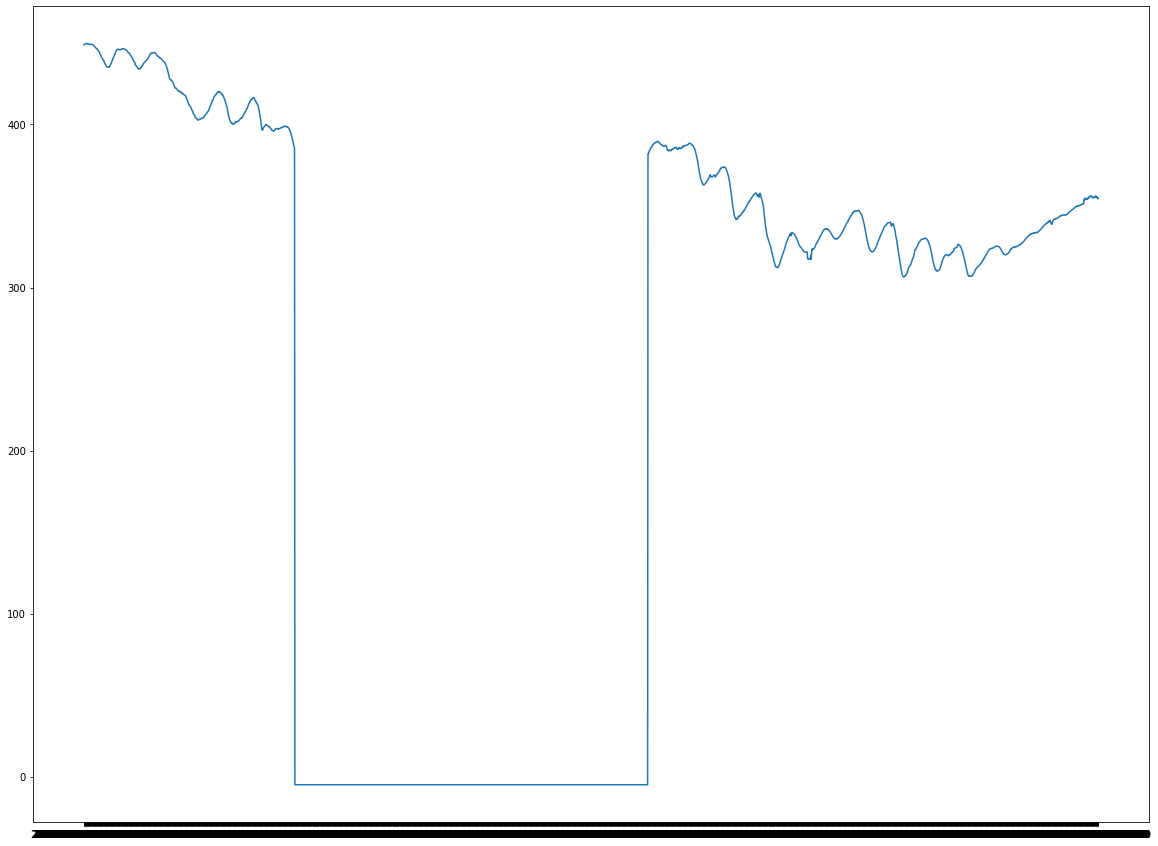

In [129]:
# raw data and adjusted data comparison
# 2019/01/01 - 2019/02/01
rawdata19 = rawdata[(rawdata["LocalDateTime"]>= '2019-04-01 00:00:00') & (rawdata["LocalDateTime"] < '2019-05-01 00:00:00')]
plt.figure(figsize=(20,15))
plt.plot(odo19["LocalDateTime"],odo19["SpCond"])
plt.plot(rawdata19["LocalDateTime"], rawdata19["SpCond"])

plt.show()

In [89]:
# sns.scatterplot(x ="LocalDateTime" , y = "ODO", data = odo19ano)
# plt.show()

# SpCond

In [90]:
spcond = adjustedData[2]

In [91]:
spcond.head()

,,,,,#
LocalDateTime,UTCOffset,DateTimeUTC,SpCond,CensorCode,QualifierCode
2014-01-01 00:00:00,-7.0,2014-01-01 07:00:00,444.4,nc,NaN
2014-01-01 00:15:00,-7.0,2014-01-01 07:15:00,444.6,nc,NaN
2014-01-01 00:30:00,-7.0,2014-01-01 07:30:00,444.9,nc,NaN
2014-01-01 00:45:00,-7.0,2014-01-01 07:45:00,445.0,nc,NaN


In [98]:
odo.columns

Index(['#'], dtype='object')